In [11]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [21]:
# load dataset
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [23]:
# check size of dataset
print("x_train = {}".format(x_train.shape))
print("y_train = {}".format(y_train.shape))
print("x_test = {}".format(x_test.shape))
print("y_test = {}".format(y_test.shape))

x_train = (60000, 28, 28)
y_train = (60000,)
x_test = (10000, 28, 28)
y_test = (10000,)


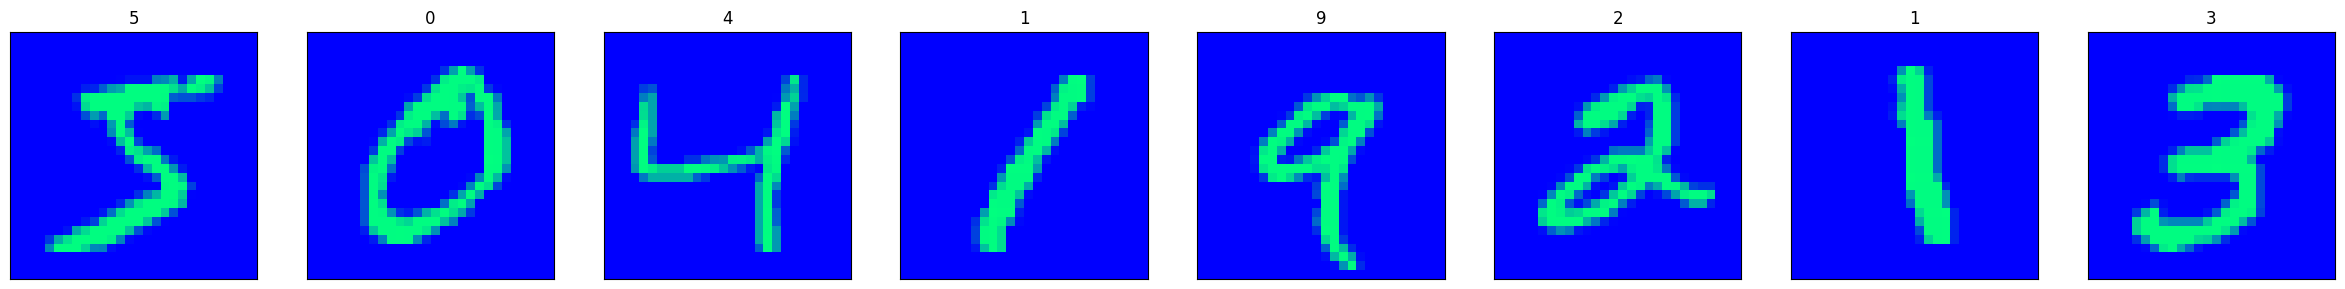

In [48]:
# show dataset
plt.figure(figsize=(30,5))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(x_train[i],cmap='winter')
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train[i])